In [306]:
import pandas as pd
import numpy as np

In [307]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [308]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [309]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [378]:
df=pd.read_csv('data_perovskites.csv')

In [379]:
new_data=pd.read_csv('rhombohedral.csv')

In [380]:
en_bl=pd.read_csv('Electronegativity and bond lengths.csv')

In [381]:
wp1=df.drop(['Formation energy [eV/atom]','Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]','Band gap [eV]'],axis=1)

In [382]:
wp1=wp1[wp1['Lowest distortion']!='-']

In [396]:
wp1['Lowest distortion'].value_counts()*100/5276

cubic           61.656558
orthorhombic    29.814253
rhombohedral     6.122062
tetragonal       2.407127
Name: Lowest distortion, dtype: float64

In [383]:
wp1['Goldschmidt Tolerance']=(wp1['Radius A [ang]']+1.4)/((2**.5)*(wp1['Radius B [ang]']+1.4))

In [384]:
wp1['Octahedral factor']=(wp1['Radius B [ang]']/1.4)

In [385]:
wp1[wp1['Chemical formula']=='BaTiO3']

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
501,BaTiO3,Ba,Ti,True,2,4,1.61,0.61,tetragonal,1.058901,0.435714


In [390]:
wp2=wp1[(wp1['Goldschmidt Tolerance'] >= 0.6) & (wp1['Goldschmidt Tolerance'] <= 1.1)]

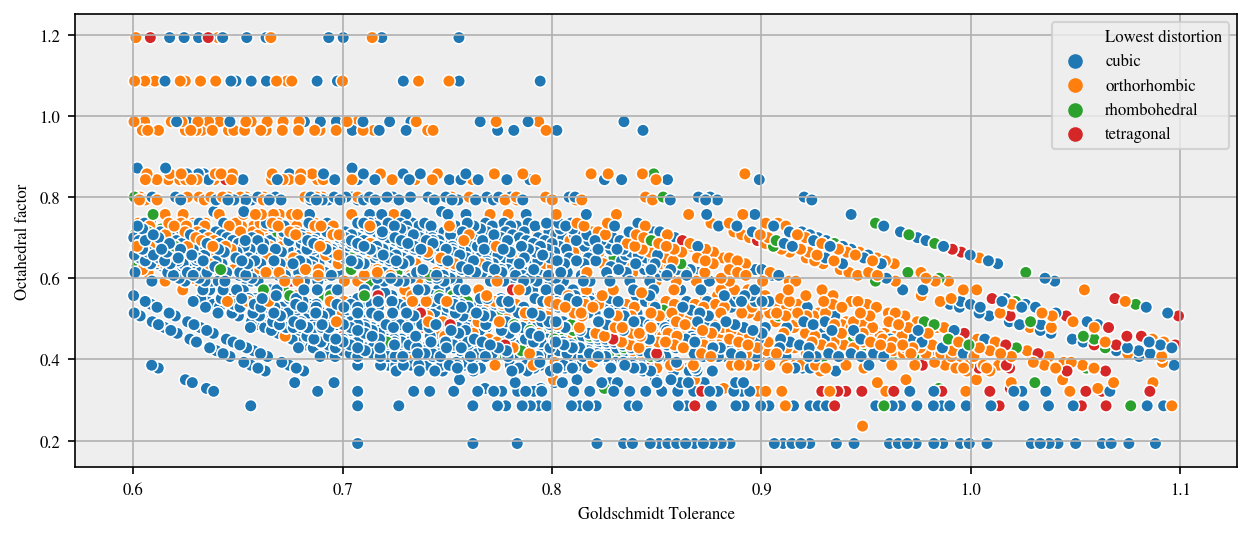

In [391]:
sns.scatterplot(wp2['Goldschmidt Tolerance'],wp2['Octahedral factor'],hue=wp2['Lowest distortion'])

In [392]:
wp3=wp2[(wp2['Octahedral factor'] >= 0.414) & (wp2['Octahedral factor'] <= 0.732)]

In [395]:
wp3['Lowest distortion'].value_counts()* 100/3699

cubic           63.963233
orthorhombic    28.899703
rhombohedral     5.406867
tetragonal       1.730197
Name: Lowest distortion, dtype: float64

In [318]:
wp1=wp1[wp1['Valence A']!='not balanced']

In [319]:
wp1=wp1[wp1['Valence A']!='element not in BV']

In [320]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
76,AgAsO3,Ag,As,False,1,5,1.28,0.46,tetragonal,1.018842,0.328571
78,AgBO3,Ag,B,False,3,3,0.75,0.27,cubic,0.910347,0.192857
81,AgBiO3,Ag,Bi,False,1,5,1.28,0.76,rhombohedral,0.877336,0.542857
86,AgCrO3,Ag,Cr,False,1,5,1.28,0.49,orthorhombic,1.002670,0.350000
100,AgIrO3,Ag,Ir,False,1,5,1.28,0.57,rhombohedral,0.961952,0.407143
...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,False,1,5,0.89,0.64,cubic,0.793762,0.457143
5319,ZrTiO3,Zr,Ti,False,2,4,0.89,0.61,cubic,0.805609,0.435714
5322,ZrUO3,Zr,U,False,1,5,0.89,0.76,orthorhombic,0.749664,0.542857
5323,ZrVO3,Zr,V,False,1,5,0.89,0.54,cubic,0.834678,0.385714


In [321]:
wp1['Valence A']=pd.to_numeric(wp1['Valence A'],downcast='float')
wp1['Valence B']=pd.to_numeric(wp1['Valence B'],downcast='float')

In [322]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
76,AgAsO3,Ag,As,False,1.0,5.0,1.28,0.46,tetragonal,1.018842,0.328571
78,AgBO3,Ag,B,False,3.0,3.0,0.75,0.27,cubic,0.910347,0.192857
81,AgBiO3,Ag,Bi,False,1.0,5.0,1.28,0.76,rhombohedral,0.877336,0.542857
86,AgCrO3,Ag,Cr,False,1.0,5.0,1.28,0.49,orthorhombic,1.002670,0.350000
100,AgIrO3,Ag,Ir,False,1.0,5.0,1.28,0.57,rhombohedral,0.961952,0.407143
...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,False,1.0,5.0,0.89,0.64,cubic,0.793762,0.457143
5319,ZrTiO3,Zr,Ti,False,2.0,4.0,0.89,0.61,cubic,0.805609,0.435714
5322,ZrUO3,Zr,U,False,1.0,5.0,0.89,0.76,orthorhombic,0.749664,0.542857
5323,ZrVO3,Zr,V,False,1.0,5.0,0.89,0.54,cubic,0.834678,0.385714


In [323]:
new_data=new_data[new_data['Valence A']!='not balanced']
new_data=new_data[new_data['Valence A']!='element not in BV']

In [324]:
new_data

,ABO3,A,B,Valence A,Valence B,Lowest distortion,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],tG,tR,Octahedral factor,VA,VB,VA/VB
76,AgAsO3,Ag,As,1,5,tetragonal,1.28,0.95,0.46,1.018995909,0.923839,0.328571429,45.369932,8.579808,5.287989
78,AgBO3,Ag,B,3,3,cubic,0.75,0.95,0.27,0.910484547,1.358334,0.192857143,23.424975,6.209951,3.772168
81,AgBiO3,Ag,Bi,1,5,rhombohedral,1.28,0.95,0.76,0.877468699,0.911822,0.542857143,45.369932,13.436928,3.376511
86,AgCrO3,Ag,Cr,1,5,orthorhombic,1.28,0.95,0.49,1.002821371,0.921930,0.35,45.369932,9.001692,5.040156
100,AgIrO3,Ag,Ir,1,5,rhombohedral,1.28,0.95,0.57,0.96209766,0.917682,0.407142857,45.369932,10.193831,4.450725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,1,5,cubic,0.89,0.72,0.64,0.793881909,0.892546,0.457142857,28.305459,11.319552,2.500581
5319,ZrTiO3,Zr,Ti,2,4,cubic,0.89,0.72,0.61,0.805730893,0.892978,0.435714286,28.305459,10.827468,2.614227
5322,ZrUO3,Zr,U,1,5,orthorhombic,0.89,0.72,0.76,0.749777359,0.892076,0.542857143,28.305459,13.436928,2.106542
5323,ZrVO3,Zr,V,1,5,cubic,0.89,0.72,0.54,0.834803657,0.894528,0.385714286,28.305459,9.735179,2.907544


In [325]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','VA/VB','tR','VA','VB']]

In [326]:
wp11=pd.merge(wp1,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [327]:
wp11=pd.merge(wp11,en_bl,how='left',left_on='Chemical formula',right_on='ABO3')

In [328]:
wp11['Bond length of A'].value_counts()

2.577786    59
2.344467    57
2.106037    56
2.294004    53
2.079036    52
            ..
2.761453    14
2.759925    13
3.025719    11
3.112266    11
3.300176     8
Name: Bond length of A, Length: 64, dtype: int64

In [329]:
wp11['New Tolerance Factor']=((wp11['rA at 6 [ang]']/wp11['rA at 12 [ang]'])/3)*((wp11['Radius A [ang]']+1.4)/(wp11['Radius B [ang]']+1.4))*((wp11['Radius B [ang]']+1.4)/1.4*(2**0.5))*((wp11['Radius A [ang]']+1.4)/1.4*(2**0.5))

In [330]:
wp11[wp11['Valence A']==1].to_csv('A1.csv')
wp11[wp11['Valence A']==2].to_csv('A2.csv')
wp11[wp11['Valence A']==3].to_csv('A3.csv')
wp11[wp11['Valence A']==4].to_csv('A4.csv')
wp11[wp11['Valence A']==5].to_csv('A5.csv')

In [331]:
#supposed_rhom = wp11[(wp11['New Tolerance Factor'] >= 0.9) & (wp11['New Tolerance Factor'] <= 1.1)]

In [332]:
#supposed_rhom['Lowest distortion'].value_counts()

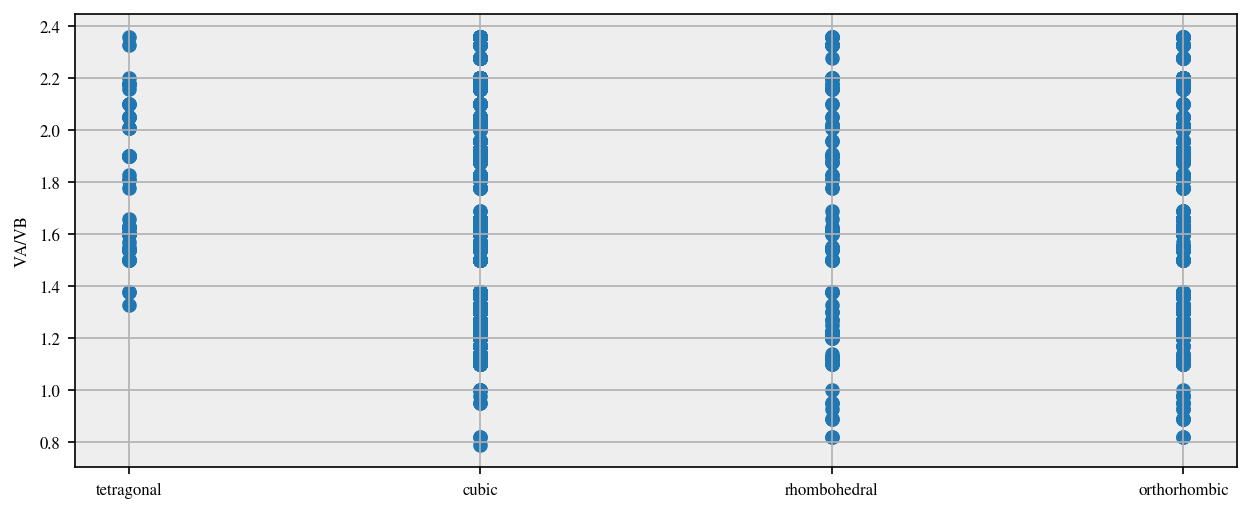

In [333]:
plt.scatter(wp11['Lowest distortion'], wp11['EN of B'])
#plt.tight_layout()
plt.ylabel('VA/VB')
plt.show()

### Watch out for this step

In [334]:
#wp11=wp11[wp11['In literature']==True]

In [335]:
wp11

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
0,AgAsO3,Ag,As,False,1.0,5.0,1.28,0.46,tetragonal,1.018842,0.328571,AgAsO3,1.28,0.95,0.46,5.287989,0.923839,45.369932,8.579808,AgAsO3,Ag,As,1.93,2.18,2.761453,1.932227,1.813159
1,AgBO3,Ag,B,False,3.0,3.0,0.75,0.27,cubic,0.910347,0.192857,AgBO3,0.75,0.95,0.27,3.772168,1.358334,23.424975,6.209951,AgBO3,Ag,B,1.93,2.04,2.761453,1.624662,1.991553
2,AgBiO3,Ag,Bi,False,1.0,5.0,1.28,0.76,rhombohedral,0.877336,0.542857,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655,1.813159
3,AgCrO3,Ag,Cr,False,1.0,5.0,1.28,0.49,orthorhombic,1.002670,0.350000,AgCrO3,1.28,0.95,0.49,5.040156,0.921930,45.369932,9.001692,AgCrO3,Ag,Cr,1.93,1.66,2.761453,1.960053,1.813159
4,AgIrO3,Ag,Ir,False,1.0,5.0,1.28,0.57,rhombohedral,0.961952,0.407143,AgIrO3,1.28,0.95,0.57,4.450725,0.917682,45.369932,10.193831,AgIrO3,Ag,Ir,1.93,2.20,2.761453,2.009083,1.813159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,ZrTaO3,Zr,Ta,False,1.0,5.0,0.89,0.64,cubic,0.793762,0.457143,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,ZrTaO3,Zr,Ta,1.33,1.50,2.383420,1.956808,1.442999
2209,ZrTiO3,Zr,Ti,False,2.0,4.0,0.89,0.61,cubic,0.805609,0.435714,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,ZrTiO3,Zr,Ti,1.33,1.54,2.383420,1.927849,1.442999
2210,ZrUO3,Zr,U,False,1.0,5.0,0.89,0.76,orthorhombic,0.749664,0.542857,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,ZrUO3,Zr,U,1.33,1.38,2.383420,2.047800,1.442999
2211,ZrVO3,Zr,V,False,1.0,5.0,0.89,0.54,cubic,0.834678,0.385714,ZrVO3,0.89,0.72,0.54,2.907544,0.894528,28.305459,9.735179,ZrVO3,Zr,V,1.33,1.63,2.383420,1.758039,1.442999


## Checking VA/VB

In [336]:
truedf=wp11[wp11['In literature']==True]

In [337]:
truedf

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
6,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,1.813159
9,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,1.813159
10,AgTaO3,Ag,Ta,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,AgTaO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgTaO3,Ag,Ta,1.93,1.50,2.761453,1.956808,1.813159
12,AgVO3,Ag,V,True,1.0,5.0,1.28,0.54,tetragonal,0.976828,0.385714,AgVO3,1.28,0.95,0.54,4.660411,0.919137,45.369932,9.735179,AgVO3,Ag,V,1.93,1.63,2.761453,1.758039,1.813159
139,BaCeO3,Ba,Ce,True,2.0,4.0,1.61,0.87,orthorhombic,0.937617,0.621429,BaCeO3,1.61,1.35,0.87,4.121420,1.116111,64.278130,15.596111,BaCeO3,Ba,Ce,0.89,1.12,2.942999,2.268642,2.584006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,YbFeO3,Yb,Fe,True,3.0,3.0,1.04,0.65,orthorhombic,0.841630,0.464286,YbFeO3,1.04,0.95,0.65,2.980800,1.053032,34.239958,11.486833,YbFeO3,Yb,Fe,1.10,1.83,2.519261,1.999522,1.849791
2129,YbMnO3,Yb,Mn,True,2.0,4.0,1.14,0.53,orthorhombic,0.930596,0.378571,YbMnO3,1.14,0.95,0.53,4.029529,0.992804,38.624680,9.585409,YbMnO3,Yb,Mn,1.10,1.55,2.519261,2.169994,1.828685
2133,YbNiO3,Yb,Ni,True,3.0,3.0,1.04,0.60,orthorhombic,0.862670,0.428571,YbNiO3,1.04,0.95,0.60,3.209996,1.054402,34.239958,10.666667,YbNiO3,Yb,Ni,1.10,1.91,2.519261,2.103725,1.849791
2149,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849,1.828685


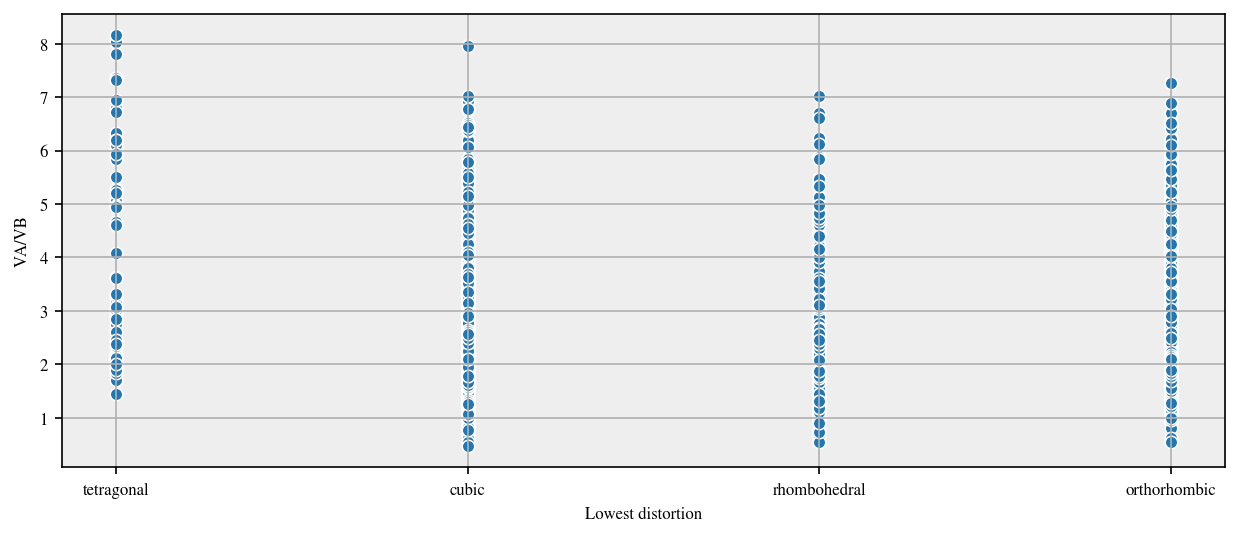

In [344]:
sns.scatterplot(wp11['Lowest distortion'],wp11['VA/VB'])

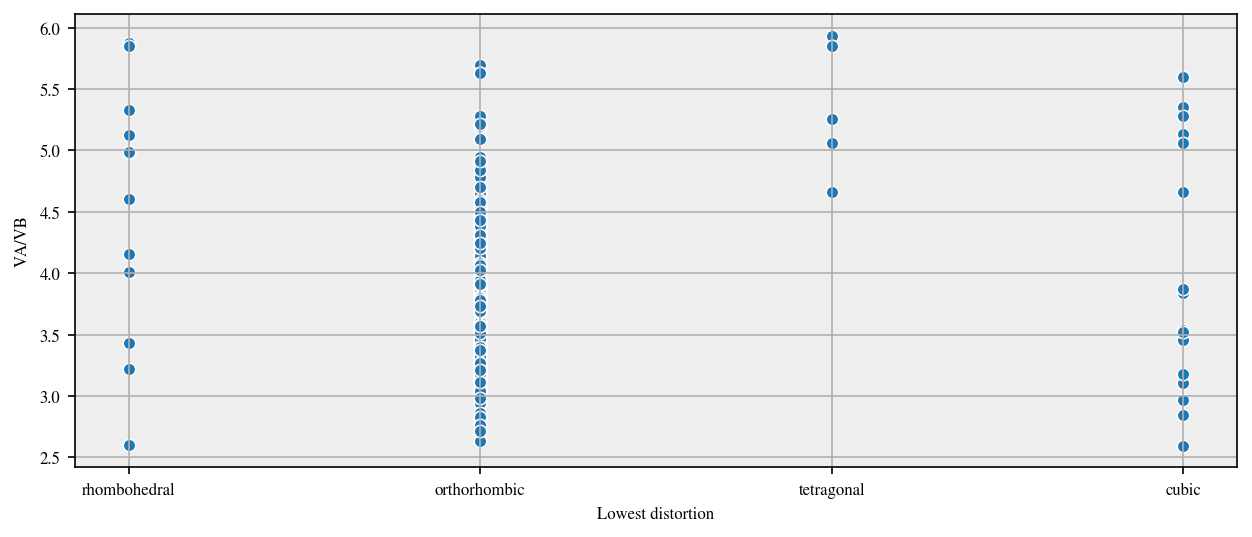

In [343]:
sns.scatterplot(truedf['Lowest distortion'],truedf['VA/VB'])

## Checking for Valence A=1 comps

In [348]:
val1=wp11[wp11['Valence A']==1]
val1_true=truedf[truedf['Valence A']==1]

val2=wp11[wp11['Valence A']==2]
val2_true=truedf[truedf['Valence A']==2]

val3=wp11[wp11['Valence A']==3]
val3_true=truedf[truedf['Valence A']==3]


## All values

In [358]:
wp11['Valence A'].value_counts()

3.0    933
2.0    884
1.0    222
4.0    146
5.0     28
Name: Valence A, dtype: int64

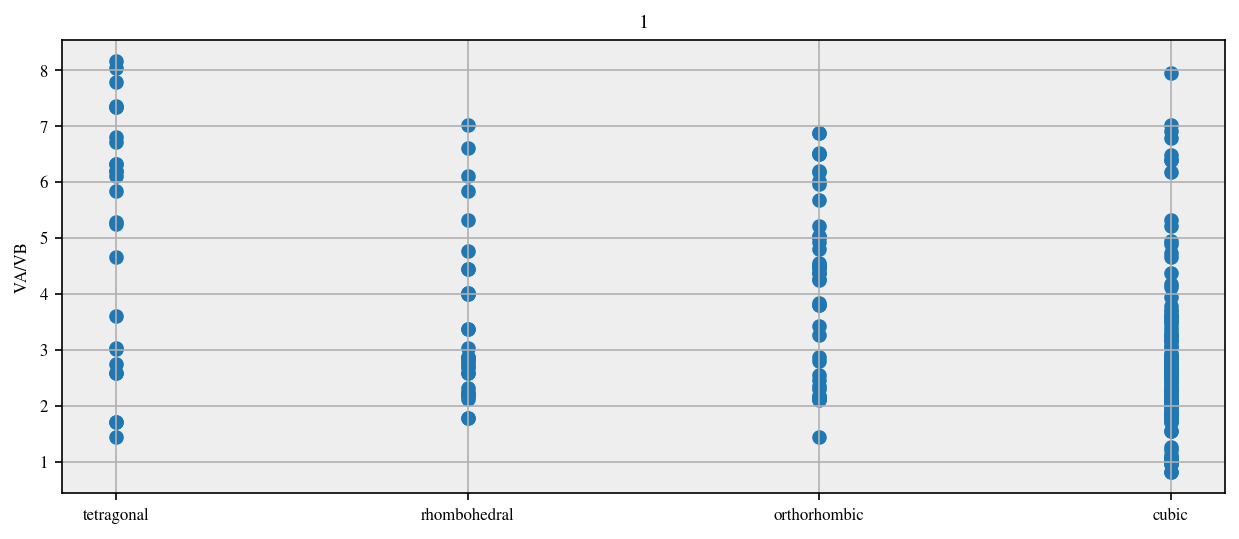

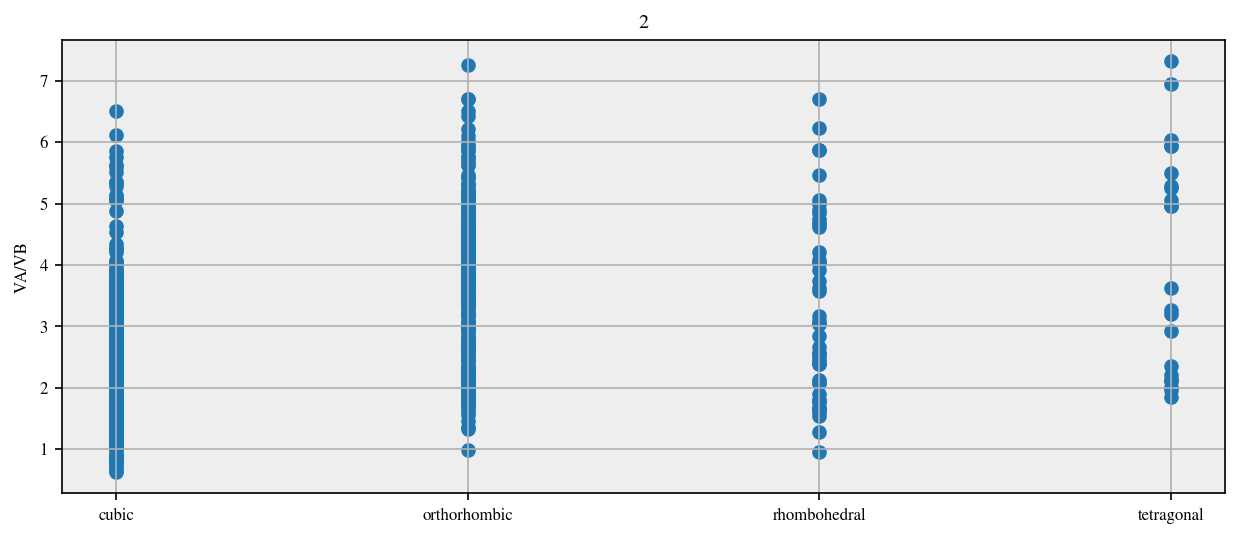

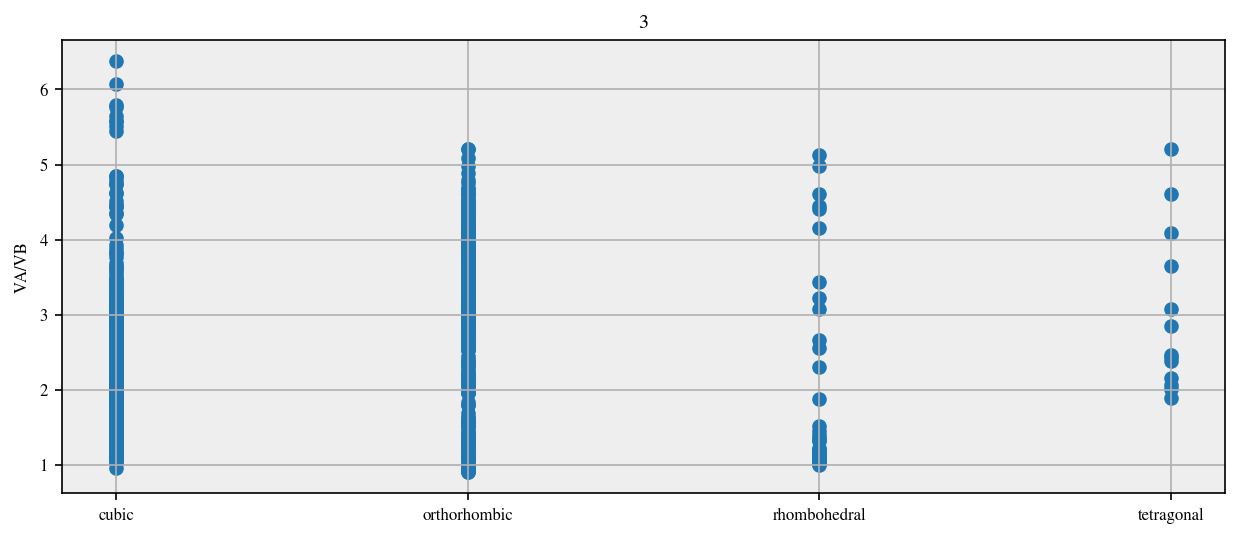

In [355]:
j=1
for i in [val1,val2,val3]:
    plt.scatter(i['Lowest distortion'],i['VA/VB'])
    plt.ylabel('VA/VB')
    plt.title(j)
    plt.show()
    j=j+1


## True values only

In [357]:
truedf['Valence A'].value_counts()

3.0    127
2.0     69
1.0     14
Name: Valence A, dtype: int64

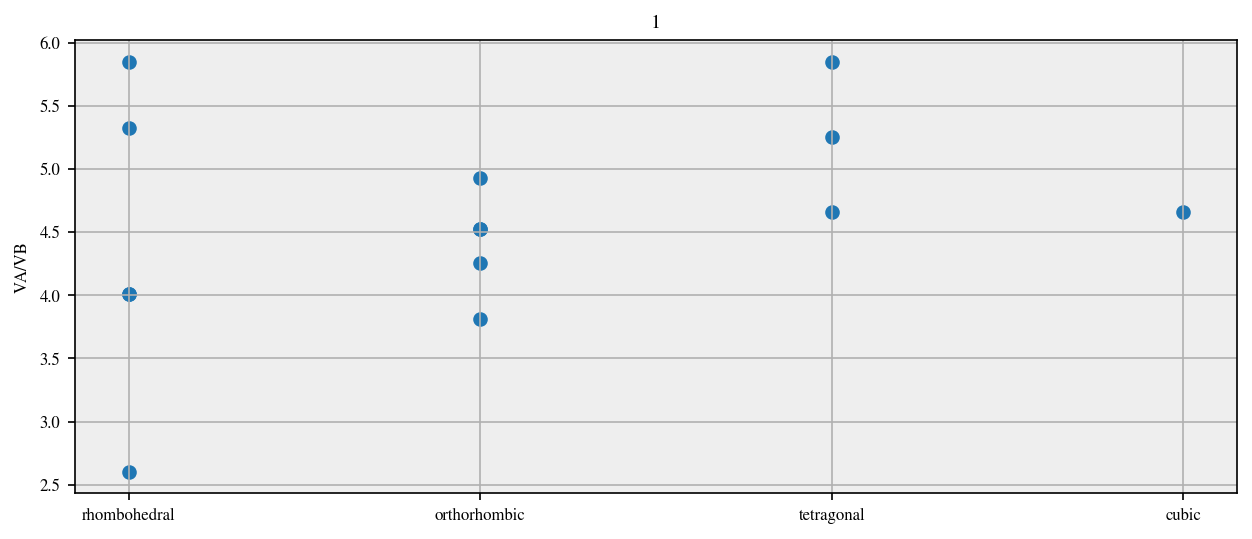

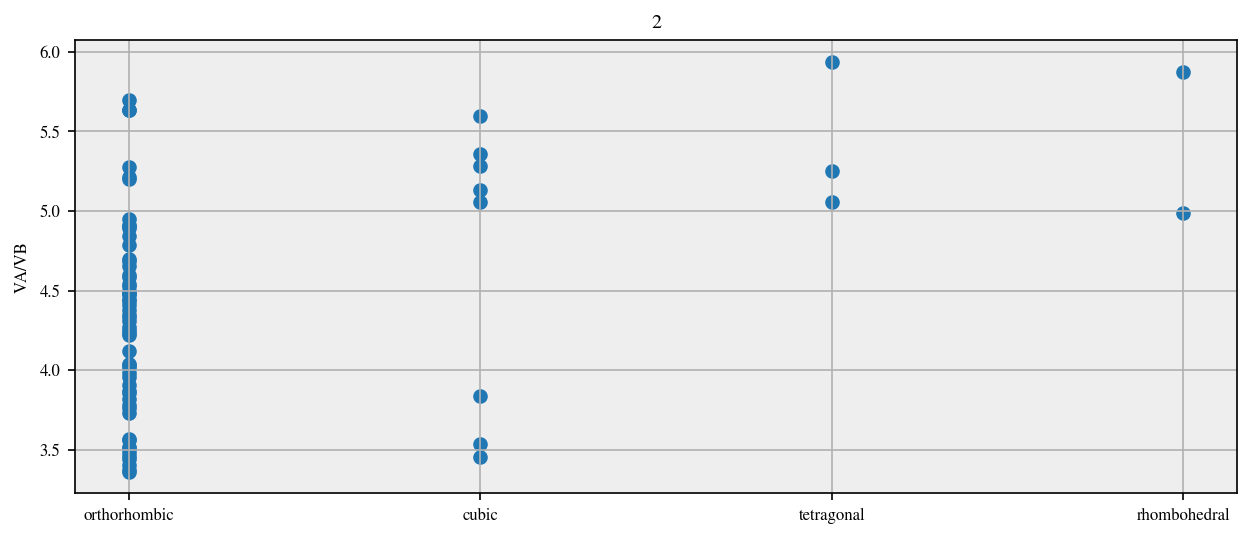

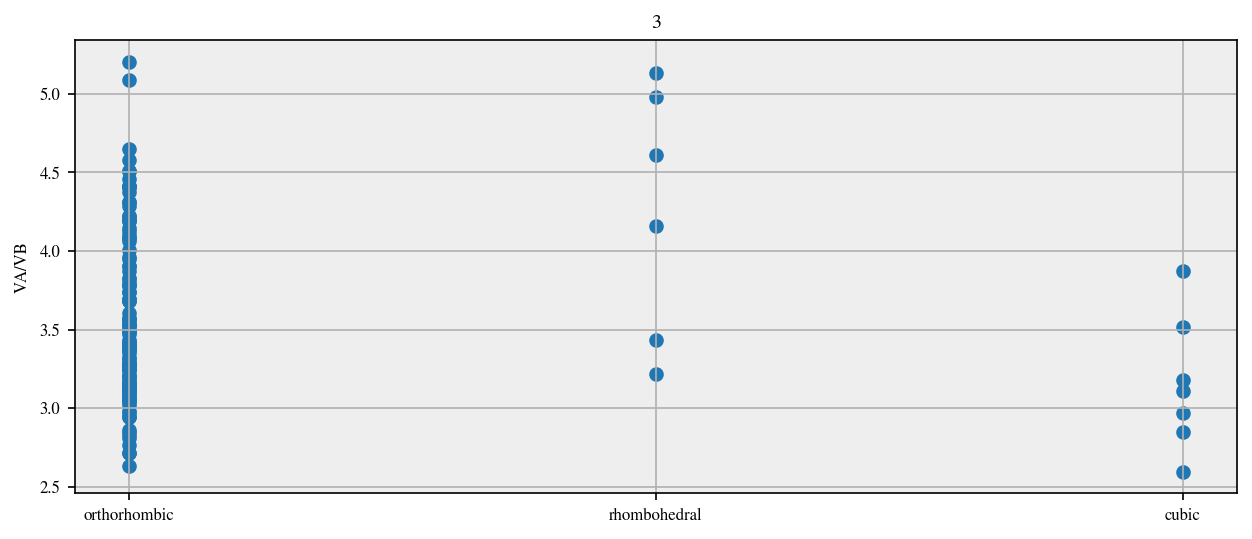

In [356]:
j=1
for i in [val1_true,val2_true,val3_true]:
    plt.scatter(i['Lowest distortion'],i['VA/VB'])
    plt.ylabel('VA/VB')
    plt.title(j)
    plt.show()
    j=j+1

## See how crystal structure varies with Valency

In [369]:
wp11[wp11['Lowest distortion']=='cubic']['Valence A'].value_counts()*100/1376

3.0    41.642442
2.0    40.552326
1.0     8.866279
4.0     7.776163
5.0     1.162791
Name: Valence A, dtype: float64

In [370]:
wp11[wp11['Lowest distortion']=='orthorhombic']['Valence A'].value_counts()*100/644

3.0    47.826087
2.0    39.596273
1.0     6.521739
4.0     4.658385
5.0     1.397516
Name: Valence A, dtype: float64

In [372]:
wp11[wp11['Lowest distortion']=='tetragonal']['Valence A'].value_counts()#*100/64

1.0    26
2.0    23
3.0    13
4.0     2
Name: Valence A, dtype: int64

In [362]:
wp11[wp11['Lowest distortion']=='rhombohedral']['Valence A'].value_counts()*100/129

2.0    37.209302
3.0    30.232558
1.0    24.806202
4.0     5.426357
5.0     2.325581
Name: Valence A, dtype: float64

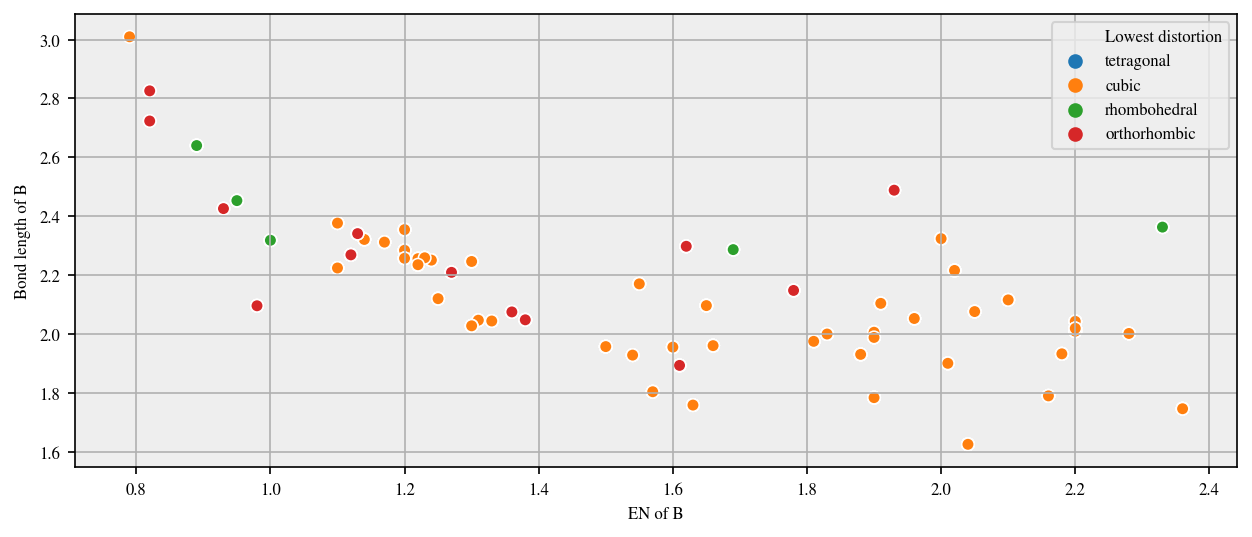

In [339]:
sns.scatterplot(wp11['EN of B'],wp11['Bond length of B'],hue=wp11['Lowest distortion'])

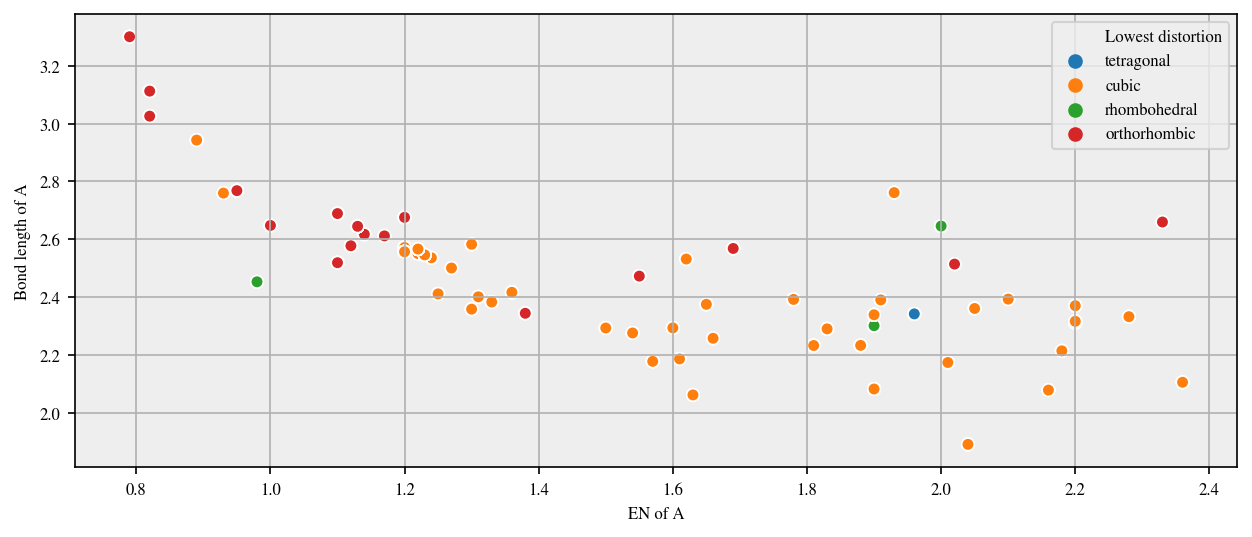

In [340]:
sns.scatterplot(wp11['EN of A'],wp11['Bond length of A'],hue=wp11['Lowest distortion'])

In [341]:
categorical = wp11.select_dtypes(include=[np.object])

numeric = wp11.select_dtypes(include=[np.int,np.float32,np.float])
numeric_cols = numeric.columns

In [184]:
categorical

,Chemical formula,A_x,B_x,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgAsO3,Ag,As,tetragonal,AgAsO3,AgAsO3,Ag,As
1,AgBO3,Ag,B,cubic,AgBO3,AgBO3,Ag,B
2,AgBiO3,Ag,Bi,rhombohedral,AgBiO3,AgBiO3,Ag,Bi
3,AgCrO3,Ag,Cr,orthorhombic,AgCrO3,AgCrO3,Ag,Cr
4,AgIrO3,Ag,Ir,rhombohedral,AgIrO3,AgIrO3,Ag,Ir
...,...,...,...,...,...,...,...,...
2208,ZrTaO3,Zr,Ta,cubic,ZrTaO3,ZrTaO3,Zr,Ta
2209,ZrTiO3,Zr,Ti,cubic,ZrTiO3,ZrTiO3,Zr,Ti
2210,ZrUO3,Zr,U,orthorhombic,ZrUO3,ZrUO3,Zr,U
2211,ZrVO3,Zr,V,cubic,ZrVO3,ZrVO3,Zr,V


In [185]:
numeric

,Valence A,Valence B,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
0,1.0,5.0,1.28,0.46,1.018842,0.328571,1.28,0.95,0.46,5.287989,0.923839,45.369932,8.579808,1.93,2.18,2.761453,1.932227,1.813159
1,3.0,3.0,0.75,0.27,0.910347,0.192857,0.75,0.95,0.27,3.772168,1.358334,23.424975,6.209951,1.93,2.04,2.761453,1.624662,1.991553
2,1.0,5.0,1.28,0.76,0.877336,0.542857,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,1.813159
3,1.0,5.0,1.28,0.49,1.002670,0.350000,1.28,0.95,0.49,5.040156,0.921930,45.369932,9.001692,1.93,1.66,2.761453,1.960053,1.813159
4,1.0,5.0,1.28,0.57,0.961952,0.407143,1.28,0.95,0.57,4.450725,0.917682,45.369932,10.193831,1.93,2.20,2.761453,2.009083,1.813159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,1.0,5.0,0.89,0.64,0.793762,0.457143,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,1.33,1.50,2.383420,1.956808,1.442999
2209,2.0,4.0,0.89,0.61,0.805609,0.435714,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,1.33,1.54,2.383420,1.927849,1.442999
2210,1.0,5.0,0.89,0.76,0.749664,0.542857,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,1.33,1.38,2.383420,2.047800,1.442999
2211,1.0,5.0,0.89,0.54,0.834678,0.385714,0.89,0.72,0.54,2.907544,0.894528,28.305459,9.735179,1.33,1.63,2.383420,1.758039,1.442999


In [186]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Valence A,Valence B,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
Valence A,1.00,-1.00,-0.16,0.31,-0.27,0.31,-0.16,-0.09,0.31,-0.27,0.15,-0.19,0.34,0.03,-0.25,-0.11,0.21,-0.09
Valence B,-1.00,1.00,0.16,-0.31,0.27,-0.31,0.16,0.09,-0.31,0.27,-0.15,0.19,-0.34,-0.03,0.25,0.11,-0.21,0.09
Radius A [ang],-0.16,0.16,1.00,-0.02,0.85,-0.02,1.00,0.93,-0.02,0.83,0.11,0.99,-0.03,-0.62,0.04,0.90,-0.03,0.88
Radius B [ang],0.31,-0.31,-0.02,1.00,-0.54,1.00,-0.02,-0.02,1.00,-0.50,0.01,-0.03,0.99,-0.00,-0.56,-0.03,0.78,-0.02
Goldschmidt Tolerance,-0.27,0.27,0.85,-0.54,1.00,-0.54,0.85,0.79,-0.54,0.98,0.10,0.84,-0.54,-0.52,0.32,0.77,-0.43,0.75
Octahedral factor,0.31,-0.31,-0.02,1.00,-0.54,1.00,-0.02,-0.02,1.00,-0.50,0.01,-0.03,0.99,-0.00,-0.56,-0.03,0.78,-0.02
rA at 12 [ang],-0.16,0.16,1.00,-0.02,0.85,-0.02,1.00,0.93,-0.02,0.83,0.11,0.99,-0.03,-0.62,0.04,0.90,-0.03,0.88
rA at 6 [ang],-0.09,0.09,0.93,-0.02,0.79,-0.02,0.93,1.00,-0.02,0.78,0.46,0.92,-0.03,-0.65,0.03,0.92,-0.03,0.99
rB at 6 [ang],0.31,-0.31,-0.02,1.00,-0.54,1.00,-0.02,-0.02,1.00,-0.50,0.01,-0.03,0.99,-0.00,-0.56,-0.03,0.78,-0.02
VA/VB,-0.27,0.27,0.83,-0.50,0.98,-0.50,0.83,0.78,-0.50,1.00,0.15,0.85,-0.49,-0.49,0.30,0.76,-0.40,0.77


In [187]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [188]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [189]:
test=wp11

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [191]:
le_target = LabelEncoder()
test['Lowest distortion']= le_target.fit_transform(test['Lowest distortion'])

In [192]:
numeric

,Valence A,Valence B,Radius A _ang_,Radius B _ang_,Goldschmidt Tolerance,Octahedral factor,rA at 12 _ang_,rA at 6 _ang_,rB at 6 _ang_,VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
0,1.0,5.0,1.28,0.46,1.018842,0.328571,1.28,0.95,0.46,5.287989,0.923839,45.369932,8.579808,1.93,2.18,2.761453,1.932227,1.813159
1,3.0,3.0,0.75,0.27,0.910347,0.192857,0.75,0.95,0.27,3.772168,1.358334,23.424975,6.209951,1.93,2.04,2.761453,1.624662,1.991553
2,1.0,5.0,1.28,0.76,0.877336,0.542857,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,1.813159
3,1.0,5.0,1.28,0.49,1.002670,0.350000,1.28,0.95,0.49,5.040156,0.921930,45.369932,9.001692,1.93,1.66,2.761453,1.960053,1.813159
4,1.0,5.0,1.28,0.57,0.961952,0.407143,1.28,0.95,0.57,4.450725,0.917682,45.369932,10.193831,1.93,2.20,2.761453,2.009083,1.813159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,1.0,5.0,0.89,0.64,0.793762,0.457143,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,1.33,1.50,2.383420,1.956808,1.442999
2209,2.0,4.0,0.89,0.61,0.805609,0.435714,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,1.33,1.54,2.383420,1.927849,1.442999
2210,1.0,5.0,0.89,0.76,0.749664,0.542857,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,1.33,1.38,2.383420,2.047800,1.442999
2211,1.0,5.0,0.89,0.54,0.834678,0.385714,0.89,0.72,0.54,2.907544,0.894528,28.305459,9.735179,1.33,1.63,2.383420,1.758039,1.442999


In [272]:
X=numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','Valence B','tR','VA','VB','rB at 6 _ang_'],axis=1)
y=test['Lowest distortion']

In [273]:
test['Lowest distortion'].value_counts()

0    1376
1     644
2     129
3      64
Name: Lowest distortion, dtype: int64

In [274]:
categorical['Lowest distortion'].value_counts()

cubic           1376
orthorhombic     644
rhombohedral     129
tetragonal        64
Name: Lowest distortion, dtype: int64

In [275]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [276]:
train_data = pd.concat([X_train, y_train], axis=1)

In [277]:
train_data['Lowest distortion'].value_counts()

0    913
1    431
2     87
3     51
Name: Lowest distortion, dtype: int64

In [278]:
cubic = train_data[train_data['Lowest distortion']==0]
orthorhombic = train_data[train_data['Lowest distortion']==1]
rhombohedral = train_data[train_data['Lowest distortion']==2]
tetragonal= train_data[train_data['Lowest distortion']==3]

In [279]:
# upsample minority
rho_upsampled = resample(rhombohedral,
 replace=True, # sample with replacement
 n_samples=len(cubic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
tetra_upsampled = resample(tetragonal,
 replace=True, # sample with replacement
 n_samples=len(cubic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
ortho_upsampled = resample(orthorhombic,
 replace=True, # sample with replacement
 n_samples=len(cubic), # match number in majority class
 random_state=27) # reproducible results

In [280]:
upsampled = pd.concat([cubic, rho_upsampled, ortho_upsampled, tetra_upsampled])

In [281]:
upsampled['Lowest distortion'].value_counts()

3    913
1    913
2    913
0    913
Name: Lowest distortion, dtype: int64

In [282]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [283]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [284]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [285]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

## SVM

In [286]:
model2.fit(X_new, y_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [287]:
model2.score(X_new,y_new)

0.6106243154435925

In [288]:
model2.score(X_test,y_test)

0.5006839945280438

In [289]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(X_test)
accuracy_score(preds,y_test)

0.5006839945280438

In [290]:
confusion_matrix(preds,y_test)

array([[217,  36,   7,   1],
       [117, 118,   9,   1],
       [ 72,  34,  21,   1],
       [ 57,  25,   5,  10]], dtype=int64)

In [291]:
y_test.value_counts()

0    463
1    213
2     42
3     13
Name: Lowest distortion, dtype: int64

In [292]:
pd.Series(preds).value_counts()

0    261
1    245
2    128
3     97
dtype: int64

In [293]:
# ACC should be above 463/731 which is 63.33%

#With valence
#acc=0.5636114911080712
#array([[266,  56,  21,   2],
 #      [125, 132,   9,   3],
  #     [ 45,  19,   8,   2],
   #    [ 27,   6,   4,   6]], dtype=int64)
    
#Without valence
#acc=0.5636114911080712

#array([[682, 118,  33,  11],
#       [144, 237,  28,   6],
#       [164, 114,  42,   0],
#       [ 88,  41,  10,  24]], dtype=int64)

#only real values
#acc=0.6285714285714286
#array([[ 3, 19,  1,  1],
 #      [ 2, 41,  2,  0],
  #     [ 0,  0,  0,  0],
    #   [ 0,  0,  1,  0]], dtype=int64)
    
#using VA/VB
#acc=0.5690834473324213
#array([[279,  56,  11,   2],
#       [ 84, 114,   8,   4],
#       [ 80,  27,  18,   2],
#       [ 20,  16,   5,   5]], dtype=int64)

#Using en and bl
#acc=0.5677154582763337

#using Va and VB
#acc=0.5622435020519836


## XGBoost

In [294]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

0.8921139101861993

In [295]:
model1.score(X_test,y_test)

0.7209302325581395

In [296]:
preds = model1.predict(X_test)
accuracy_score(preds,y_test)

0.7209302325581395

In [297]:
confusion_matrix(preds,y_test)

array([[365,  46,   5,   2],
       [ 64, 131,   9,   1],
       [ 18,  21,  23,   2],
       [ 16,  15,   5,   8]], dtype=int64)

In [298]:
X_new['Valence A'].value_counts()

2.0    1425
3.0    1250
1.0     735
4.0     198
5.0      44
Name: Valence A, dtype: int64

In [299]:
X_new['Valence B'].value_counts()

KeyError: 'Valence B'

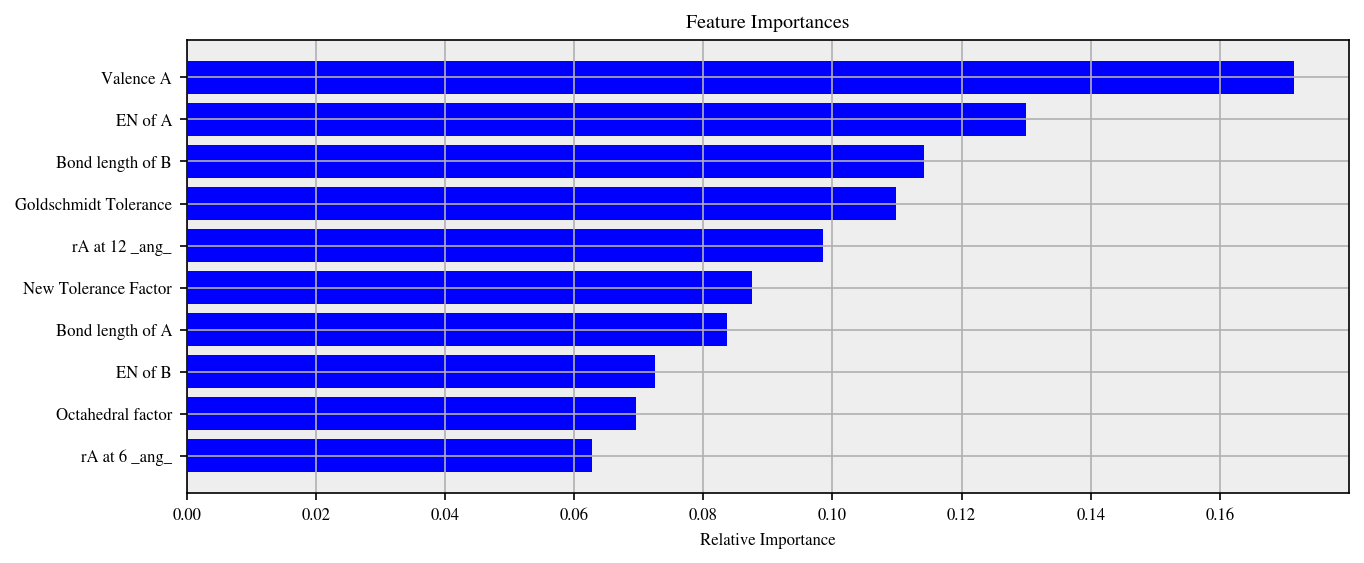

In [300]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [301]:
#acc with only valence A = 0.6607387140902873
#array([[327,  48,   7,   0],
#       [ 74, 121,   8,   0],
#       [ 38,  27,  25,   3],
#       [ 24,  17,   2,  10]], dtype=int64)

#using VA/VB
#0.6566347469220246

#Without taking the valencies 
#acc=0.6061997703788748

# New tolerance factor performs better than tR
##takin en and bl
#acc=0.7209302325581395

#VA/VB and Valence B do not have any effect

# VA and VB also have no effect in the prediction and rB at 6 also has no effect
#acc=0.719562243502052

## Decision Tree

In [138]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [139]:
model3.score(X_test,y_test)

0.7209302325581395

In [140]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.7209302325581395

In [141]:
confusion_matrix(preds,y_test)

array([[380,  56,  11,   6],
       [ 55, 127,  13,   3],
       [ 19,  25,  16,   0],
       [  9,   5,   2,   4]], dtype=int64)

In [142]:
pd.Series(preds).value_counts()

0    453
1    198
2     60
3     20
dtype: int64

## Random Forest

In [143]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [144]:
model4.score(X_test,y_test)

0.7811217510259918

In [145]:
accuracy_score(preds,y_test)

0.7209302325581395

In [146]:
confusion_matrix(preds,y_test)

array([[380,  56,  11,   6],
       [ 55, 127,  13,   3],
       [ 19,  25,  16,   0],
       [  9,   5,   2,   4]], dtype=int64)

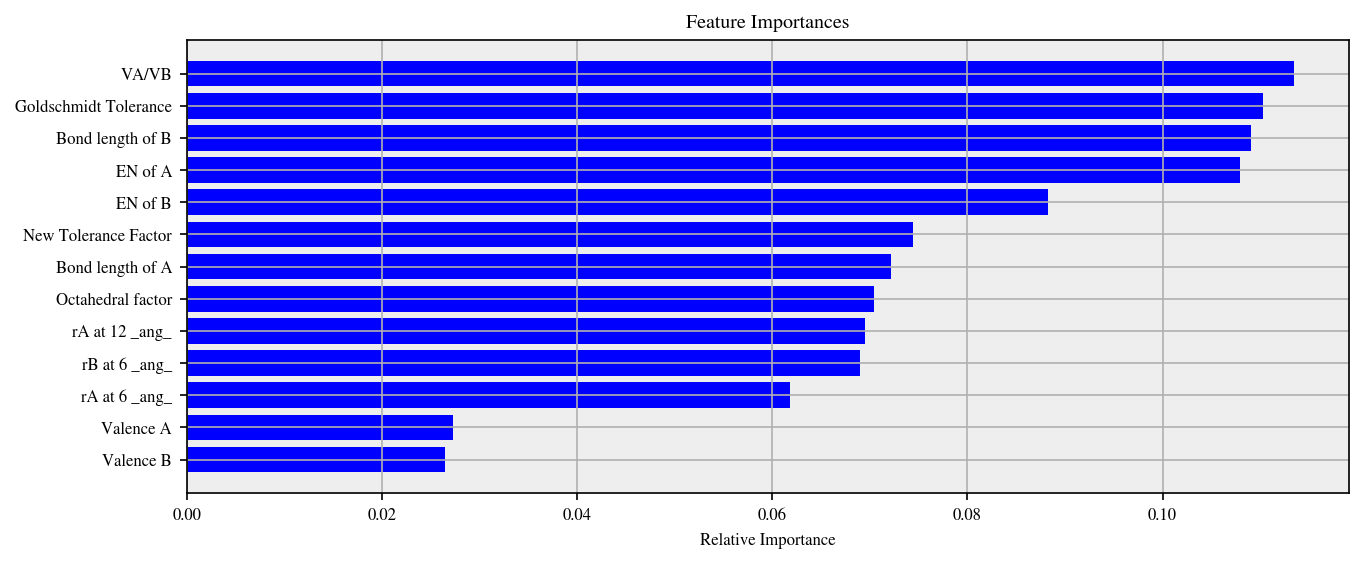

In [147]:
features = X_new.columns
importances = model4.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [148]:
#with both valence a and b
#0.7113543091655267
#array([[381,  71,  10,   4],
#       [ 64, 113,   9,   3],
#       [ 13,  21,  22,   2],
#       [  5,   8,   1,   4]], dtype=int64)

#without valence B
#unchanged.

#Using VA/VB
#0.7099863201094391

#using en and bl
#acc=0.7346101231190151


